## Importing necessary modules and libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Reading the train and test datasets

In [14]:
# importing drive, comment out the next two lines if running on local device
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
DATA_PATH='./' # replace with Data Path before execution
train_file=pd.read_pickle(DATA_PATH + "train.pkl")
test_file=pd.read_pickle(DATA_PATH + "test.pkl")

## Visualising the given dataset

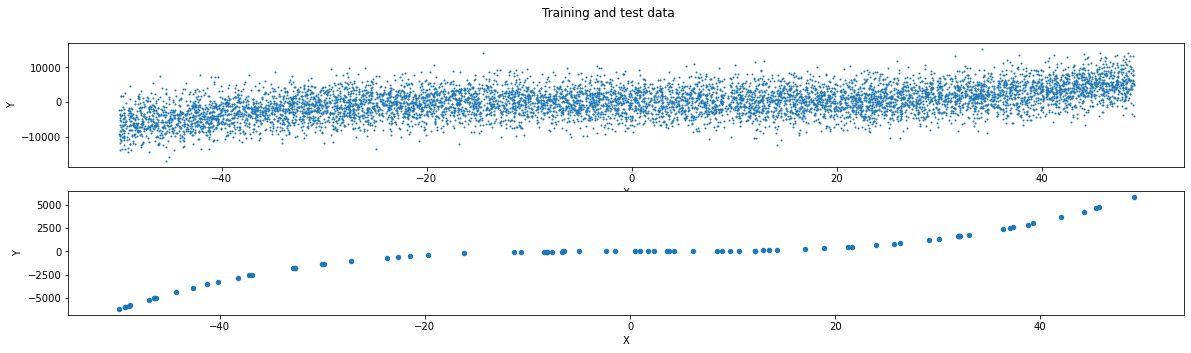

In [16]:
df_train = pd.DataFrame(train_file, columns=["X", "Y"])
df_test = pd.DataFrame(test_file, columns=["X", "Y"])
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2)
fig.suptitle('Training and test data')
df_train.plot.scatter(x = "X", y='Y', s=1, ax=axs[0])
df_test.plot.scatter(x = "X", y='Y', ax=axs[1])
plt.show()

## Visualising the training sets after splitting

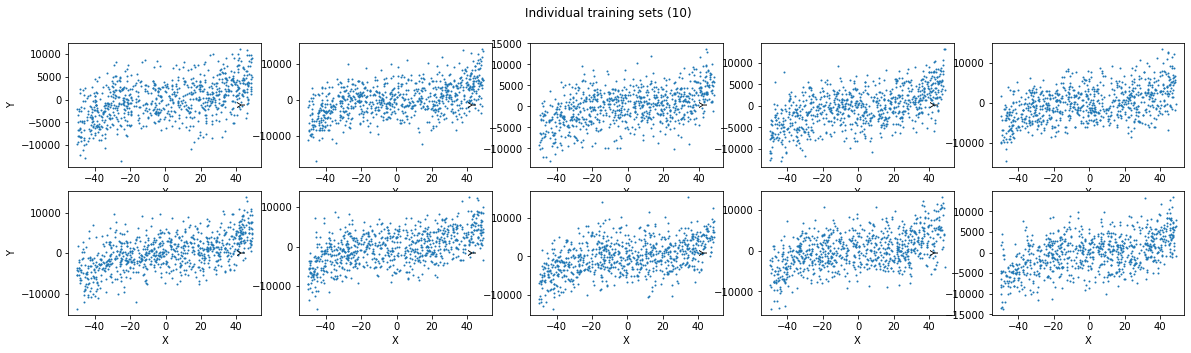

In [17]:
shuffled_train = df_train.sample(frac=1)
final_train = np.array_split(shuffled_train,10)
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2, 5)
fig.suptitle('Individual training sets (10)')
for i in range(10):
  final_train[i].plot.scatter(x = "X", y='Y', s=1, ax=axs[int(i/5)][i%5])
plt.show()

## Making models for the polynomial regression

In [18]:
def polyModel (deg, X, Y):
  poly = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False, interaction_only=False), LinearRegression())

  X = np.array(X).reshape(-1, 1)
  Y = np.array(Y).reshape(-1, 1)

  poly.fit(X, Y)
  return poly

## Calculating Bias and Variance and tabulating them:

In [19]:
test_X = np.array(df_test['X']).reshape(-1,1)
test_Y = np.array(df_test['Y']).reshape(-1,1)

final_list = []
final_bias_var=[]
final_sec=[]
model=[]

for i in range(20):
  deg = i+1

  for j in range(10):
    temp_model=polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    model.append(temp_model)

for i in range(20):
  deg = i+1


  exp_val = np.zeros([80,1])

  for j in range(10):
    exp_val += model[(deg-1)*10+j].predict(test_X)
  
  exp_val/=10
  current_bias=exp_val-test_Y


  var_val = np.zeros([80,1])

  for j in range(10):
    var_val+= (model[(deg-1)*10+j].predict(test_X) -exp_val) ** 2

  var_val/=10


  temp_bias_square = (current_bias.flatten())**2
  temp_var = var_val.flatten()

  data = {"Bias Squares":temp_bias_square, "Variance": temp_var}
  final=pd.DataFrame(data)
  final_list.append(final)
  
  average_bias_square = np.mean(temp_bias_square)
  average_var = np.mean(temp_var)
  temp_element=[deg, average_bias_square, average_var]
  final_bias_var.append(temp_element)

  average_bias = np.mean(current_bias.flatten())
  temp_element=[deg, average_bias, average_var]
  final_sec.append(temp_element)
  

df_final_sec=pd.DataFrame(final_sec, columns=['Degree', 'Bias', 'Variance'])
df_final_sec

,Degree,Bias,Variance
0,1,230.999083,41663.230654
1,2,223.757672,47962.386589
2,3,-15.809085,54421.427071
3,4,-9.393410,84466.677734
4,5,-8.069212,89719.244173
5,6,-6.653591,99970.097742
6,7,-3.956608,179752.804217
7,8,-6.541790,211112.288410
8,9,-4.912845,246798.383011
9,10,-6.995527,243656.535835


## Tabulating Bias Square and Variance

In [20]:
df_final_bias_var=pd.DataFrame(final_bias_var, columns=['Degree', 'Bias Square', 'Variance'])
df_final_bias_var

,Degree,Bias Square,Variance
0,1,1.002297e+06,41663.230654
1,2,9.515659e+05,47962.386589
2,3,9.464218e+03,54421.427071
3,4,7.863673e+03,84466.677734
4,5,7.685958e+03,89719.244173
5,6,7.427206e+03,99970.097742
6,7,8.229203e+03,179752.804217
7,8,8.009709e+03,211112.288410
8,9,7.625021e+03,246798.383011
9,10,9.301513e+03,243656.535835


## Calculating the Mean Square Error (MSE):

In [21]:
list_mse=[]

for i in range(20):
  deg = i + 1

  temp_list = np.zeros([80,1])

  for j in range(10):
    temp_mse=(model[(deg-1)*10+j].predict(test_X) - test_Y) ** 2
    temp_list+=temp_mse

  temp_list/=10
  deg_mse=np.mean(temp_list.flatten())

  temp_element=[deg, deg_mse]
  list_mse.append(temp_element)
  
df_list_mse=pd.DataFrame(list_mse, columns=['Degree', 'MSE'])
df_list_mse

,Degree,MSE
0,1,1.043960e+06
1,2,9.995283e+05
2,3,6.388565e+04
3,4,9.233035e+04
4,5,9.740520e+04
5,6,1.073973e+05
6,7,1.879820e+05
7,8,2.191220e+05
8,9,2.544234e+05
9,10,2.529580e+05



## Calulating Irreducible Error and tabulating the same:


In [22]:
ire_list = df_list_mse['MSE']-(df_final_bias_var['Variance'] + df_final_bias_var['Bias Square'])

degrees=list(range(1,21))

df_ire= pd.DataFrame(degrees, columns=['Degree'])
df_ire['Irreducible Error']=ire_list

df_ire

,Degree,Irreducible Error
0,1,-1.164153e-10
1,2,-2.328306e-10
2,3,0.000000e+00
3,4,0.000000e+00
4,5,0.000000e+00
5,6,1.455192e-11
6,7,0.000000e+00
7,8,-8.731149e-11
8,9,-5.820766e-11
9,10,-2.910383e-11


## Plotting the Bias Square and Variance, versus the Degree

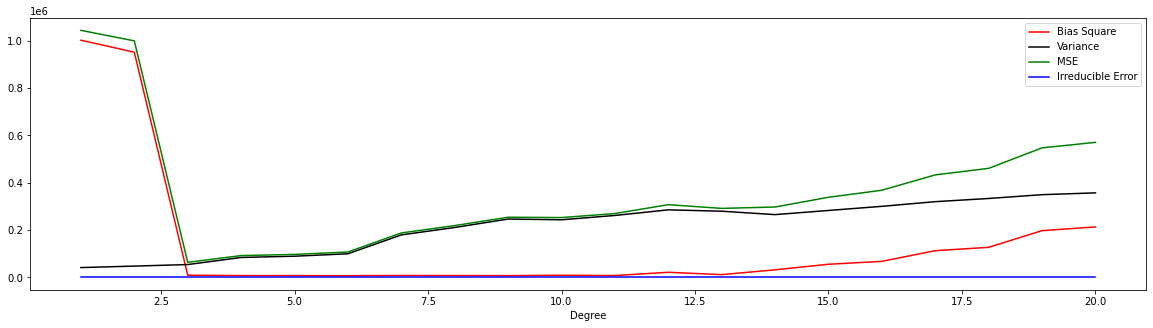

In [23]:
plt.rcParams["figure.figsize"] = (20, 5)
ax1 = df_final_bias_var.plot(x = "Degree", y='Bias Square', color="red", kind='line')
ax2 = df_final_bias_var.plot(x = "Degree", y='Variance', color="black", kind='line', ax=ax1)
ax3 = df_list_mse.plot(x = "Degree", y='MSE', color="green", kind='line', ax=ax1)
ax4 = df_ire.plot(x = "Degree", y='Irreducible Error', color="blue", kind='line', ax=ax1)
plt.show()

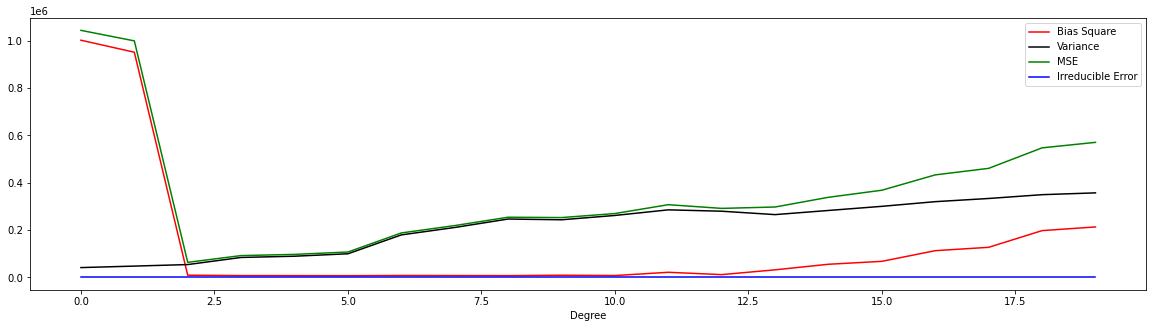

In [24]:
fig, ax = plt.subplots() # Create a figure and an axis
ax.plot(df_final_bias_var['Bias Square'], label='Bias Square', color='red')
ax.plot(df_final_bias_var['Variance'], label='Variance', color='black')
ax.plot(df_list_mse['MSE'], label='MSE', color='green')
ax.plot(df_ire['Irreducible Error'], label='Irreducible Error', color='blue')
ax.set_xlabel('Degree')
ax.legend()  # Add a legend
fig.savefig("Graph1.png")